In [1]:
# NAME : OMER BIN ALI BAJUBAIR
# ZID  :  Z1905006
# AML ASSIGNMENT 4 

import pandas as pd
from sklearn.preprocessing import LabelEncoder

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split

from sklearn.metrics import ( accuracy_score, roc_auc_score,
                             precision_score, recall_score,
                             classification_report
                             )

from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import CondensedNearestNeighbour,EditedNearestNeighbours

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (10,6)
plt.rcParams['figure.dpi'] = 140
seed = 123

data_orig = pd.read_excel('healthcare-dataset-stroke-data.xlsx')

# Preprocessing

data = data_orig.copy() # creating a copy of data

# drop ID
data.drop('id', axis=1, inplace=True)

# drop NA

data.dropna(inplace=True)


# Label  encode the categorical columns

# get all categorical columns
cat_cols = data.select_dtypes('object').columns

for col in cat_cols:
    # break
    encoder = LabelEncoder()
    encoded = encoder.fit_transform(data[col])
    data[col] = encoded
    









In [2]:
# Q1. Train DT, RandomForest and Gradient Boosting

target = 'stroke'

train, test = train_test_split(data)

def train_model(model, train, test, target, show_classwise_performance=True):
    
    xtrain, ytrain = train.drop(target, axis=1), train[target]
    xtest, ytest = test.drop(target, axis=1), test[target]
    
    model.fit(xtrain,ytrain)
    test_pred = model.predict(xtest)

    if show_classwise_performance:
        print(classification_report(ytest, test_pred)) 
    print('ROC AUC : ', roc_auc_score(ytest,test_pred))
    print('Average Precision :', precision_score(ytest, test_pred, average = 'macro'))
    return 

def built_tree_models(train, test, target, show_classwise_performance= True):
    print('Working on Training...')
    print('The test performance of model are as follows : ')
    print('Decision tree :')
    dt = DecisionTreeClassifier(max_depth = 10 ,random_state = seed )
    train_model(dt, train, test, target, show_classwise_performance)
    
    print('Random Forest :')
    rf = RandomForestClassifier(random_state = seed)
    train_model(rf, train, test, target, show_classwise_performance)
    
    print('Gradient Boosting Tree :')
    gb = GradientBoostingClassifier(random_state = seed)
    train_model(gb, train, test, target, show_classwise_performance)
    
    return dt, rf, gb

print('Q1 : Using Unbalanced Data for Model Building')
dt, rf, gb = built_tree_models(train, test, target)
print("="*50)

Q1 : Using Unbalanced Data for Model Building
Working on Training...
The test performance of model are as follows : 
Decision tree :
              precision    recall  f1-score   support

           0       0.96      0.97      0.96      1174
           1       0.07      0.06      0.06        54

    accuracy                           0.93      1228
   macro avg       0.51      0.51      0.51      1228
weighted avg       0.92      0.93      0.92      1228

ROC AUC :  0.5111678970282036
Average Precision : 0.5142134425439653
Random Forest :
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1174
           1       0.00      0.00      0.00        54

    accuracy                           0.96      1228
   macro avg       0.48      0.50      0.49      1228
weighted avg       0.91      0.96      0.93      1228

ROC AUC :  0.4995741056218058
Average Precision : 0.4779951100244499
Gradient Boosting Tree :
              precision    recall 

In [3]:
## Q2 Try different balancing techiniques and build the models
xtrain, ytrain = train.drop(target, axis=1), train[target]

print('Q2 : Using Various techiniques to balance the data for Model Building')
print()
for sampler in [RandomOverSampler(), EditedNearestNeighbours(), CondensedNearestNeighbour(),SMOTE() ]:
    xtrain_sampled, ytrain_sampled = sampler.fit_resample(xtrain, ytrain)
    train_sampled = pd.concat([xtrain_sampled, ytrain_sampled], axis=1)
    
    print("Balancing the Data using : ", type(sampler).__name__)
    dt_sampled, rf_sampled, gb_sampled = built_tree_models(train_sampled, test,
                                                     target, show_classwise_performance = False)
    print("="*50)

Q2 : Using Various techiniques to balance the data for Model Building

Balancing the Data using :  RandomOverSampler
Working on Training...
The test performance of model are as follows : 
Decision tree :
ROC AUC :  0.6145971354659601
Average Precision : 0.5418502837063279
Random Forest :
ROC AUC :  0.5054262098555115
Average Precision : 0.5282430213464696
Gradient Boosting Tree :
ROC AUC :  0.7043031106063474
Average Precision : 0.5532916392363396
Balancing the Data using :  EditedNearestNeighbours
Working on Training...
The test performance of model are as follows : 
Decision tree :
ROC AUC :  0.5670389299009401
Average Precision : 0.5524302985442882
Random Forest :
ROC AUC :  0.5071297873682883
Average Precision : 0.5616475722858701
Gradient Boosting Tree :
ROC AUC :  0.5407596693797716
Average Precision : 0.6186409550045914
Balancing the Data using :  CondensedNearestNeighbour
Working on Training...
The test performance of model are as follows : 
Decision tree :
ROC AUC :  0.5802258

Q3 : Finding Important Features : 


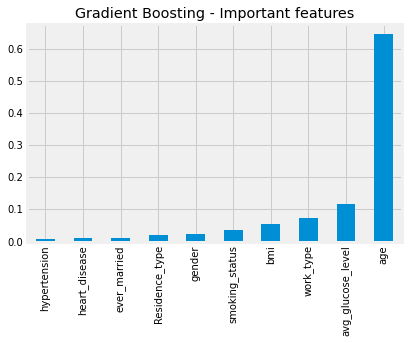

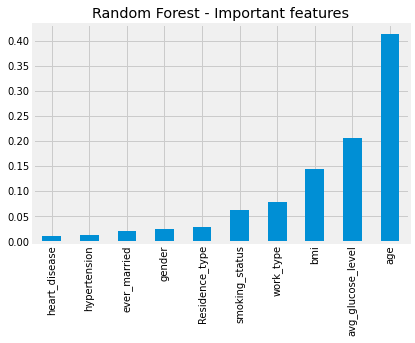

In [4]:
print('Q3 : Finding Important Features : ')
rf_imp_vars = pd.Series(rf_sampled.feature_importances_,index =xtrain_sampled.columns  )
gb_imp_vars = pd.Series(gb_sampled.feature_importances_,index =xtrain_sampled.columns  )
gb_imp_vars.sort_values().plot.bar(title = 'Gradient Boosting - Important features')
plt.show()
rf_imp_vars.sort_values().plot.bar(title = 'Random Forest - Important features')
plt.show()

print("="*50)


'Q4 : Brief Report on Findings from Resampling experiment : '

It can be clearly seen the performance using Oversampling Techiques is better
when compared to undersampling techiniques because in under sampling we are using 
extremely small dataset to train ~200 rows, where as in oversample we are using ~7000 rows

However, if the data set in imbalance then In such cases, you get a pretty high accuracy just by predicting the majority class, but you fail to capture the minority class, which is most often the point of creating the model in the first place. In a dataset with highly unbalanced classes, the classifier will always “predicts” the most common class without performing any analysis of the features and it will have a high accuracy rate, obviously not the correct one.

The simplest implementation of over-sampling is to duplicate random records from the minority class, which can cause overfishing.

In under-sampling, the simplest technique involves removing random records from the majority class, which can cause loss of information.

Undersampling can be defined as removing some observations of the majority class. This is done until the majority and minority class is balanced out.

Oversampling can be defined as adding more copies to the minority class. Oversampling can be a good choice when you don’t have a ton of data to work with.


Random oversampling can be implemented using the RandomOverSampler class. The class can be defined and takes a sampling_strategy argument that can be set to “minority” to automatically balance the minority class with majority class or classes.

EditedNearestNeighbours :  Undersample based on the edited nearest neighbour method. This method will clean the database by removing samples close to the decision boundary.


Condensed Nearest Neighbors, or CNN for short, is an undersampling technique that seeks a subset of a collection of samples that results in no loss in model performance, referred to as a minimal consistent set.


SMOTE works by selecting examples that are close in the feature space, drawing a line between the examples in the feature space and drawing a new sample at a point along that line.



